In [1]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# DATA

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np


max_features = 10000
max_len = 500


print('Loading data...')
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
np.load = np_load_old



print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


# Modelo Conv1D

In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])



history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.8337 - acc: 0.5088 - val_loss: 0.6875 - val_acc: 0.5640
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6700 - acc: 0.6399 - val_loss: 0.6642 - val_acc: 0.6586
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6236 - acc: 0.7559 - val_loss: 0.6081 - val_acc: 0.7428
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5260 - acc: 0.8095 - val_loss: 0.4855 - val_acc: 0.8062
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4117 - acc: 0.8483 - val_loss: 0.4218 - val_acc: 0.8354
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3470 - acc: 0.8682 - val_loss: 0.4181 - val_acc: 0.8376
Epoch 7/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3118 - acc: 0.8636 - val_loss: 0.4288 - val_acc:

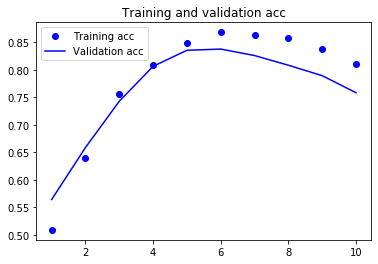

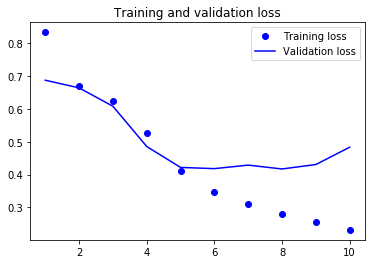

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(loss) + 1)


plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();